In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

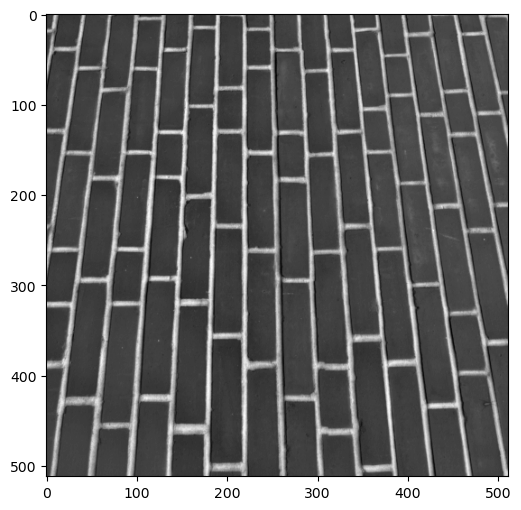

In [2]:
#get the brick image 
from skimage.data import brick
image = brick().astype(np.float32)
image_copy = image.copy()

# Create a figure and set the size
plt.figure(figsize=(8, 6))  # Specify width and height in inches

plt.imshow(image, cmap = 'gray');


# Harris corner detection 

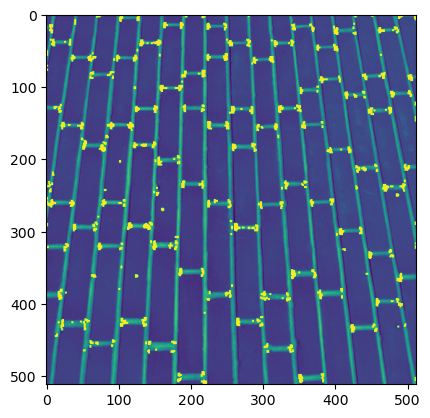

In [3]:
#apply harris corner detection
img_corner = cv.cornerHarris(image.copy(), 2 ,3 ,0.04) #[image , blocksize for guassian , kernal size for sobel , k]

#result is dilated for marking the corners, not important
dst = cv.dilate(img_corner , None)

image[dst> 0.01 * dst.max()] = [255]

plt.imshow(image)

In [4]:
#fuction to apply harris corner
def harris(image, gray_img, block_size, ksize, k):
    """
    This function applies Harris corner detection to an image using OpenCV's cv.cornerHarris().

    It follows a series of steps, starting with the application of Gaussian filtering to a grayscale image. 
    Subsequently, Sobel operators are employed to detect gradients in both the x and y directions. 
    The resulting gradient information is then used in the Harris corner detection algorithm. 
    Finally, the corners are highlighted through a dilation operation.

    Args:
        image (numpy.ndarray): The original color image.
        gray_img (numpy.ndarray): The grayscale version of the input image.
        block_size (int): The block size for Gaussian filtering.
        ksize (int): The window size for Sobel operators.
        k (float): The Harris detector free parameter.

    Returns:
        dst (numpy.ndarray): An array containing the Harris corner response for each pixel.
        image (numpy.ndarray): The original image with highlighted corners.

    Example:
        dst: [
                0, 
                -0.0001, 
                2
            ]
    """

    
    
    #apply harris corner 
    dst = cv.cornerHarris(gray_img, block_size, ksize, k)
    
    #make dilation to get of the non corners
    dst = cv.dilate(dst,None)
    
    #setup the threshold to detect the most corners
    if len (image.shape) == 2:
        image[dst > 0.01 * dst.max()] = [255]
    else:
        image[dst > 0.01 * dst.max()] = [0, 0, 255]
    
    return dst , image 

In [5]:
dst, img_corner= harris(image_copy, image_copy, 2, 3, 0.1)

In [6]:
dst.shape

(512, 512)

In [7]:
dst

array([[-1.5625000e-03, -1.5625000e-03,  7.7148434e-03, ...,
        -8.3974609e+01, -8.3974609e+01, -1.6922363e+02],
       [-1.5625000e-03, -1.5625000e-03,  1.7324218e-01, ...,
         1.1807514e+04,  1.1807514e+04,  1.1807514e+04],
       [-1.5625000e-03, -1.5625000e-03,  1.7324218e-01, ...,
         1.1807514e+04,  1.1807514e+04,  1.1807514e+04],
       ...,
       [ 8.6914062e-01,  8.6914062e-01,  8.6914062e-01, ...,
        -1.5770386e+01,  3.0526404e+02,  3.0526404e+02],
       [ 8.6914062e-01,  8.6914062e-01,  8.6914062e-01, ...,
        -1.2358291e+03,  8.6977539e+00,  8.6977539e+00],
       [ 8.6914062e-01,  8.6914062e-01,  8.6914062e-01, ...,
        -1.2519127e+03, -7.8119144e+00, -7.8119144e+00]], dtype=float32)

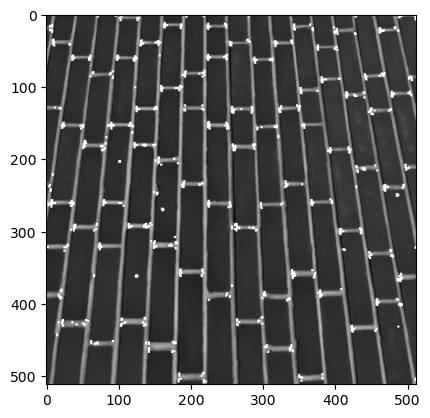

In [8]:
plt.imshow(img_corner , cmap = 'gray')